In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load Data from Drive
DATA_PATH="/content/drive/My Drive/J_PHD/CICIDS2018/"
!ls "/content/drive/My Drive/J_PHD/CICIDS2018"

fri0203.csv
fri1602.csv
fri2302.csv
Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
thur0103.csv
thur1502.csv
thur2202.csv
Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
wed0402.csv
wed2102.csv
wed2802.csv
Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [ ]:
df1 = pd.read_csv(DATA_PATH+'fri0203.csv')
df2 = pd.read_csv(DATA_PATH+'fri1602.csv')
df3 = pd.read_csv(DATA_PATH+'fri2302.csv')
df4 = pd.read_csv(DATA_PATH+'thur0103.csv')
df5 = pd.read_csv(DATA_PATH+'thur1502.csv')
df6 = pd.read_csv(DATA_PATH+'thur2202.csv')
df7 = pd.read_csv(DATA_PATH+'wed0402.csv')
df8 = pd.read_csv(DATA_PATH+'wed2102.csv')
df9 = pd.read_csv(DATA_PATH+'wed2802.csv')

In [ ]:
data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])

In [ ]:
data.shape

(206538, 81)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206538 entries, 0 to 15226
Data columns (total 81 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         206538 non-null  int64  
 1   Dst Port           206538 non-null  int64  
 2   Protocol           206538 non-null  int64  
 3   Timestamp          206538 non-null  object 
 4   Flow Duration      206538 non-null  int64  
 5   Tot Fwd Pkts       206538 non-null  int64  
 6   Tot Bwd Pkts       206538 non-null  int64  
 7   TotLen Fwd Pkts    206538 non-null  int64  
 8   TotLen Bwd Pkts    206538 non-null  float64
 9   Fwd Pkt Len Max    206538 non-null  int64  
 10  Fwd Pkt Len Min    206538 non-null  int64  
 11  Fwd Pkt Len Mean   206538 non-null  float64
 12  Fwd Pkt Len Std    206538 non-null  float64
 13  Bwd Pkt Len Max    206538 non-null  int64  
 14  Bwd Pkt Len Min    206538 non-null  int64  
 15  Bwd Pkt Len Mean   206538 non-null  float64
 16  Bwd

In [ ]:
data['Label'].value_counts()

Benign                      152099
DDOS attack-HOIC             17222
DoS attacks-Hulk             11553
Bot                           7130
FTP-BruteForce                4824
SSH-Bruteforce                4734
Infilteration                 4034
DoS attacks-SlowHTTPTest      3555
DoS attacks-GoldenEye         1012
DoS attacks-Slowloris          306
DDOS attack-LOIC-UDP            47
Brute Force -Web                12
Brute Force -XSS                 7
SQL Injection                    3
Name: Label, dtype: int64

In [ ]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [ ]:
data.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
# droping nan and inf rows
# first replacing all inf values with nan
data_real = data.replace(np.inf, np.nan)

In [ ]:
data_real.isnull().sum().sum()

706

In [ ]:
data_df = data_real.dropna(axis=0)

In [ ]:
data_df.isnull().sum().sum()

0

In [ ]:
df1 = data_df
df1.loc[df1.Label == "Benign", "Label"] = 1.0
df1.loc[df1.Label != 1, "Label"] = 0.0

In [ ]:
df1

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 09:51:47,122146,6,6,1549,3356.0,906,0,...,20,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
1,3389,6,02/03/2018 09:48:23,3298817,9,10,1229,1911.0,677,0,...,20,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
2,8080,6,02/03/2018 02:28:24,431,2,0,0,0.0,0,0,...,20,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,53,17,02/03/2018 08:47:05,445,1,1,41,169.0,41,41,...,8,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
4,443,6,02/03/2018 04:53:17,5142188,7,5,358,176.0,230,0,...,20,50377.0,0.00000,50377.0,50377.0,5091778.0,0.000000,5091778.0,5091778.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,443,6,28/02/2018 10:16:29,353616,9,7,512,4471.0,194,0,...,20,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
15223,53,17,28/02/2018 12:15:08,102956,2,2,90,164.0,45,45,...,8,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
15224,3389,6,28/02/2018 09:16:18,1678845,8,7,1128,1581.0,661,0,...,20,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
15225,53,17,28/02/2018 05:03:58,240,1,1,35,67.0,35,35,...,8,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0


In [ ]:
df1.Label.unique()

array([1.0, 0.0], dtype=object)

In [ ]:
df1.Label.value_counts()

1.0    151761
0.0     54424
Name: Label, dtype: int64

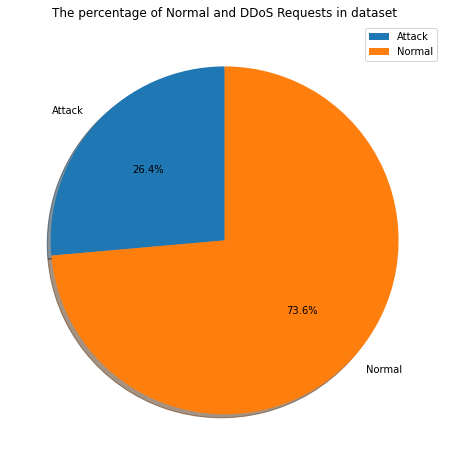

In [ ]:
labels = ["Attack",'Normal']
sizes = [dict(df1.Label.value_counts())[0], dict(df1.Label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["Attack", "Normal"])
plt.title('The percentage of Normal and DDoS Requests in dataset')
plt.show()

In [ ]:
numeric_df = df1.select_dtypes(include=['int64', 'float64'])
object_df = df1.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
 

In [ ]:
data_X = df1.drop(['Label','Timestamp'], axis = 1)

In [ ]:
data_X.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

In [ ]:
data_X.shape

(206185, 78)

In [ ]:
data_y = df1['Label']

In [ ]:
data_y.shape

(206185,)

In [ ]:
df1.isnull().sum().sum()

0

In [ ]:
data_y.unique()

array([1.0, 0.0], dtype=object)

In [ ]:
data_y

0        1.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
15222    1.0
15223    1.0
15224    1.0
15225    1.0
15226    1.0
Name: Label, Length: 206185, dtype: object

In [ ]:
data_X

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,443,6,122146,6,6,1549,3356.0,906,0,258.166667,...,3,20,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
1,3389,6,3298817,9,10,1229,1911.0,677,0,136.555556,...,6,20,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
2,8080,6,431,2,0,0,0.0,0,0,0.000000,...,0,20,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
3,53,17,445,1,1,41,169.0,41,41,41.000000,...,0,8,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
4,443,6,5142188,7,5,358,176.0,230,0,51.142857,...,3,20,50377.0,0.00000,50377.0,50377.0,5091778.0,0.000000,5091778.0,5091778.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,443,6,353616,9,7,512,4471.0,194,0,56.888889,...,4,20,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
15223,53,17,102956,2,2,90,164.0,45,45,45.000000,...,1,8,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
15224,3389,6,1678845,8,7,1128,1581.0,661,0,141.000000,...,5,20,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
15225,53,17,240,1,1,35,67.0,35,35,35.000000,...,0,8,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0


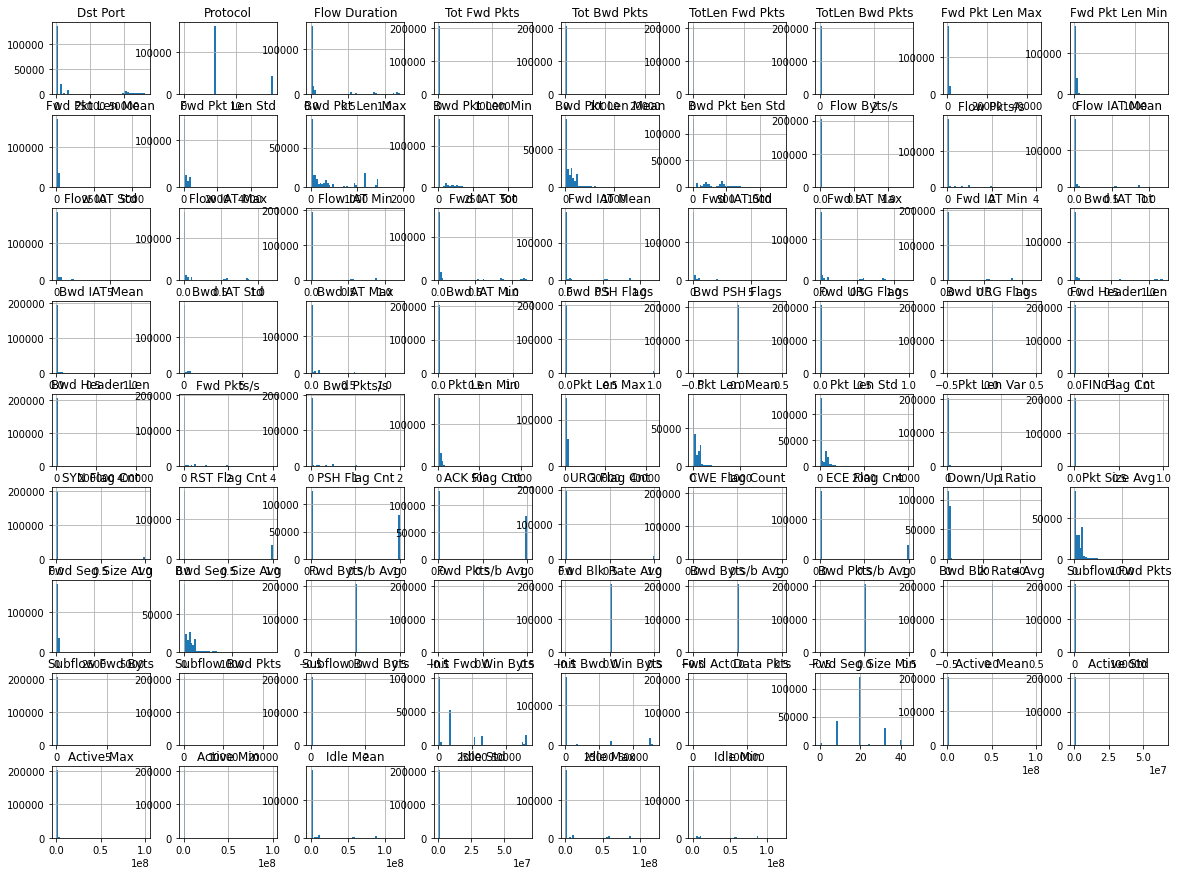

In [ ]:
data_X.hist(bins = 50, figsize=(20, 15))
plt.show()

**Label Encoding for the Dataset**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_y_trans = le.fit_transform(data_y)
data_y_trans

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
data_X

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,443,6,122146,6,6,1549,3356.0,906,0,258.166667,...,3,20,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
1,3389,6,3298817,9,10,1229,1911.0,677,0,136.555556,...,6,20,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
2,8080,6,431,2,0,0,0.0,0,0,0.000000,...,0,20,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
3,53,17,445,1,1,41,169.0,41,41,41.000000,...,0,8,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
4,443,6,5142188,7,5,358,176.0,230,0,51.142857,...,3,20,50377.0,0.00000,50377.0,50377.0,5091778.0,0.000000,5091778.0,5091778.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,443,6,353616,9,7,512,4471.0,194,0,56.888889,...,4,20,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
15223,53,17,102956,2,2,90,164.0,45,45,45.000000,...,1,8,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
15224,3389,6,1678845,8,7,1128,1581.0,661,0,141.000000,...,5,20,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
15225,53,17,240,1,1,35,67.0,35,35,35.000000,...,0,8,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0


**Feature Selection**

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=42)
model.fit(data_X, data_y_trans)

ExtraTreesClassifier(random_state=42)

In [ ]:
model.feature_importances_

array([1.09555906e-01, 3.03048206e-02, 2.03849861e-02, 4.29481580e-03,
       6.20813142e-03, 3.18915726e-03, 3.94882787e-03, 1.04795071e-02,
       2.80543700e-03, 1.52495483e-02, 1.86367393e-02, 2.35965455e-02,
       3.96685203e-03, 1.21814553e-02, 1.32652015e-02, 6.64015192e-03,
       3.09759196e-02, 1.81667462e-02, 5.58454601e-03, 1.63723909e-02,
       1.66649135e-02, 1.63949995e-02, 1.33425902e-02, 4.22999118e-03,
       1.13009582e-02, 1.04243003e-02, 5.27780262e-03, 3.80549279e-03,
       2.62826791e-03, 2.80559896e-03, 1.92608094e-03, 6.96904557e-03,
       0.00000000e+00, 2.80819040e-05, 0.00000000e+00, 2.18266146e-02,
       1.04115999e-02, 2.60572946e-02, 2.21883024e-02, 4.00827007e-03,
       1.07069525e-02, 1.50288645e-02, 1.26293930e-02, 5.37093227e-03,
       1.02302856e-03, 6.29873202e-03, 1.21611393e-02, 1.33966920e-02,
       3.94336963e-02, 6.01604428e-03, 4.81439097e-05, 1.14230999e-02,
       3.53786828e-03, 1.04494770e-02, 7.88895681e-03, 1.44288901e-02,
      

<Axes: title={'center': 'Standardised Dataset Feature Selection using ExtraTreesClassifier'}>

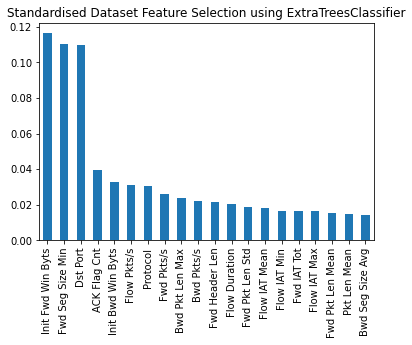

In [ ]:
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [ ]:
data_X.shape

(206185, 78)

In [ ]:
data_new_20features_X = data_X[['Init Fwd Win Byts', 'Fwd Seg Size Min', 'Dst Port', 'ACK Flag Cnt', 'Init Bwd Win Byts', 'Fwd Pkts/s', 'Protocol', 'Flow Pkts/s', 'Bwd Pkt Len Max', 'Bwd Pkts/s', 'Fwd Header Len', 'Flow Duration', 'Fwd Pkt Len Std', 'Flow IAT Mean', 'Flow IAT Min', 'Fwd IAT Tot', 'Flow IAT Max', 'Fwd Pkt Len Mean', 'Pkt Len Min', 'Bwd Seg Size Avg']]

In [ ]:
data_new_20features_X

,Init Fwd Win Byts,Fwd Seg Size Min,Dst Port,ACK Flag Cnt,Init Bwd Win Byts,Fwd Pkts/s,Protocol,Flow Pkts/s,Bwd Pkt Len Max,Bwd Pkts/s,Fwd Header Len,Flow Duration,Fwd Pkt Len Std,Flow IAT Mean,Flow IAT Min,Fwd IAT Tot,Flow IAT Max,Fwd Pkt Len Mean,Pkt Len Min,Bwd Seg Size Avg
0,8192,20,443,0,63,49.121543,6,98.243086,1460,49.121543,132,122146,375.260132,1.110418e+04,1.0,96092.0,39451.0,258.166667,0,559.333333
1,8192,20,3389,0,62856,2.728251,6,5.759641,1173,3.031390,192,3298817,214.120942,1.832676e+05,3.0,3298817.0,953138.0,136.555556,0,191.100000
2,2053,20,8080,1,-1,4640.371230,6,4640.371230,0,0.000000,40,431,0.000000,4.310000e+02,431.0,431.0,431.0,0.000000,0,0.000000
3,-1,8,53,0,-1,2247.191011,17,4494.382022,169,2247.191011,8,445,0.000000,4.450000e+02,445.0,0.0,445.0,41.000000,41,169.000000
4,8192,20,443,0,8789,1.361288,6,2.333637,107,0.972349,152,5142188,84.680633,4.674716e+05,2.0,5142188.0,5091778.0,51.142857,0,35.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,8192,20,443,0,172,25.451337,6,45.246821,1430,19.795484,192,353616,83.482699,2.357440e+04,1.0,353616.0,265477.0,56.888889,0,638.714286
15223,-1,8,53,0,-1,19.425774,17,38.851548,82,19.425774,16,102956,0.000000,3.431867e+04,501.0,102455.0,78289.0,45.000000,45,82.000000
15224,8192,20,3389,0,62872,4.765181,6,8.934714,1173,4.169533,172,1678845,222.623321,1.199175e+05,32.0,1678845.0,953716.0,141.000000,0,225.857143
15225,-1,8,53,0,-1,4166.666667,17,8333.333333,67,4166.666667,8,240,0.000000,2.400000e+02,240.0,0.0,240.0,35.000000,35,67.000000


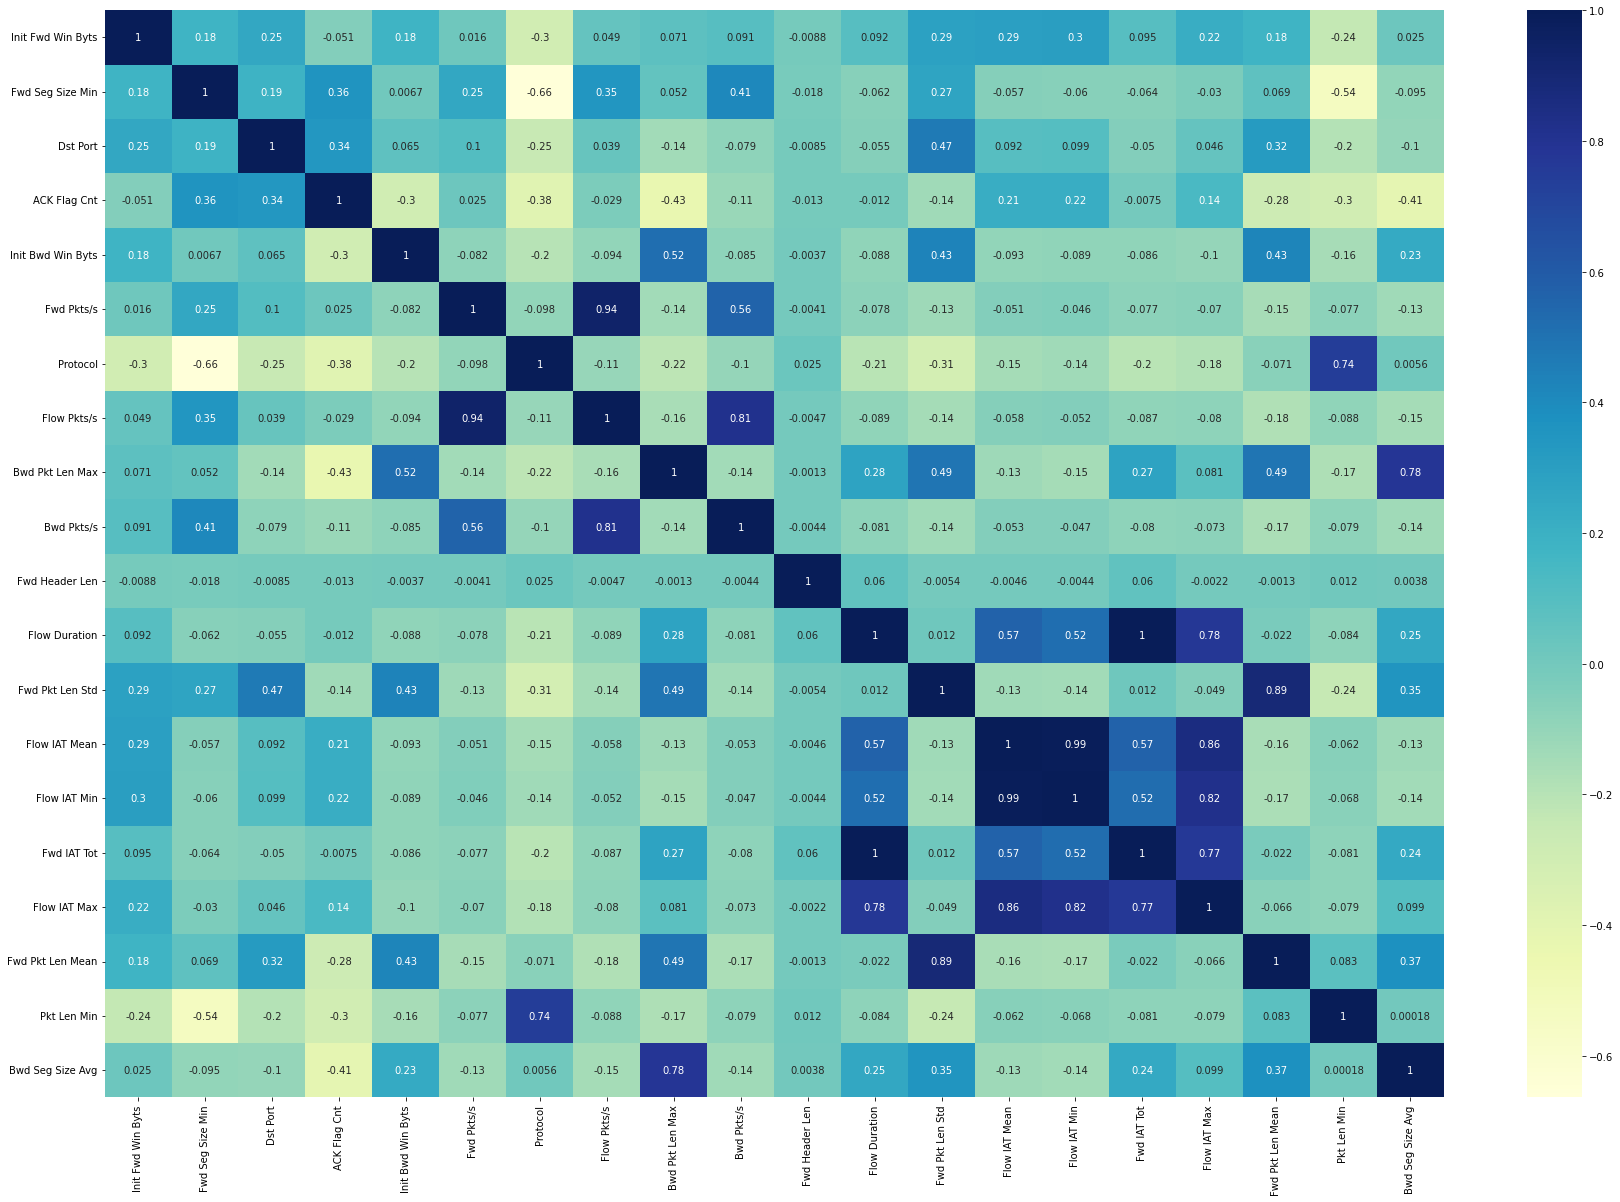

In [ ]:
corr_matrix = data_new_20features_X.corr()
import seaborn as sns
# corr_mat=dns.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, annot=True, cmap = "YlGnBu")
plt.show()

**Train Test Split 20 Feature Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

**Standardization of the 20 Feature Dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

In [ ]:
X_train_std_20.shape

(144329, 20)

In [ ]:
y_train_20.shape

(144329,)

In [ ]:
X_test_std_20.shape

(61856, 20)

In [ ]:
y_test_20.shape

(61856,)

In [ ]:
import matplotlib.pyplot as plt
def show_acc(history, val = False):
    acc = history.history['acc']

    loss = history.history['loss']
    print("Train accuracy :", history.history['acc'][-1])

    if val:
        val_acc = history.history['val_acc']
        val_loss = history.history['val_loss']
        print("Test accuracy  :", history.history['val_acc'][-1])

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'g', label='Training acc')
    if val:
        plt.plot(epochs, val_acc, 'r', label='Testing acc')
        plt.title('Training and testing accuracy')
    else:
        plt.title('Training accuracy')

    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'g', label='Training loss')

    if val:

        plt.plot(epochs, val_loss, 'r', label='Testing loss')
        plt.title('Training and test loss')
    else:
        plt.title("Training loss")
    plt.legend()

    plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
def create_baseline():
  model = Sequential()
   
  model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))

  model.add(MaxPooling1D(pool_size=2))

  model.add(Dropout(rate=0.2))

  model.add(LSTM(units=64, return_sequences=True))

  model.add(Flatten())

  model.add(Dense(units=32, activation='relu'))

  model.add(Dropout(rate=0.2))

  model.add(Dense(units=1, activation='sigmoid'))

  model.summary()
  
  model.compile(optimizer='adam', metrics=['acc'], loss='binary_crossentropy')
  return model

In [ ]:
model = create_baseline()

In [ ]:
history = model.fit(X_train_std_20, y_train_20,  validation_data=(X_test_std_20, y_test_20), batch_size=200, epochs= 50, verbose=0)

In [ ]:
show_acc(history, val=True)

In [ ]:
predict = model.predict(X_test_std_20, verbose=1)

1933/1933 [==============================] - 3s 2ms/step
